The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette("viridis")

file_path = 'taylor_swift_spotify.csv'
df = pd.read_csv(file_path)
print(df.head())
numeric_df = df.select_dtypes(include=['number'])

   Unnamed: 0                                  name  \
0           0         Fortnight (feat. Post Malone)   
1           1         The Tortured Poets Department   
2           2  My Boy Only Breaks His Favorite Toys   
3           3                              Down Bad   
4           4                       So Long, London   

                                          album release_date  track_number  \
0  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1   
1  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2   
2  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             3   
3  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             4   
4  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             5   

                       id                                   uri  acousticness  \
0  6dODwocEuGzHAavXqTbwHv  spotify:track:6dODwocEuGzHAavXqTbwHv        0.5020   
1  4PdLaGZubp4lghChqp8erB  spotify:tra

In [7]:
print(df.describe())

       Unnamed: 0  track_number  acousticness  danceability      energy  \
count  582.000000     582.00000    582.000000    582.000000  582.000000   
mean   290.500000      11.42268      0.333185      0.580804    0.565832   
std    168.153204       8.04206      0.327171      0.114553    0.191102   
min      0.000000       1.00000      0.000182      0.175000    0.118000   
25%    145.250000       5.00000      0.037325      0.515000    0.418000   
50%    290.500000      10.00000      0.184500      0.593500    0.571000   
75%    435.750000      15.00000      0.660000      0.653000    0.719000   
max    581.000000      46.00000      0.971000      0.897000    0.948000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        582.000000  582.000000  582.000000   582.000000  582.000000   
mean           0.003393    0.161130   -7.661986     0.056475  122.398954   
std            0.027821    0.136563    2.904653     0.070859   30.408485   
min            0.000

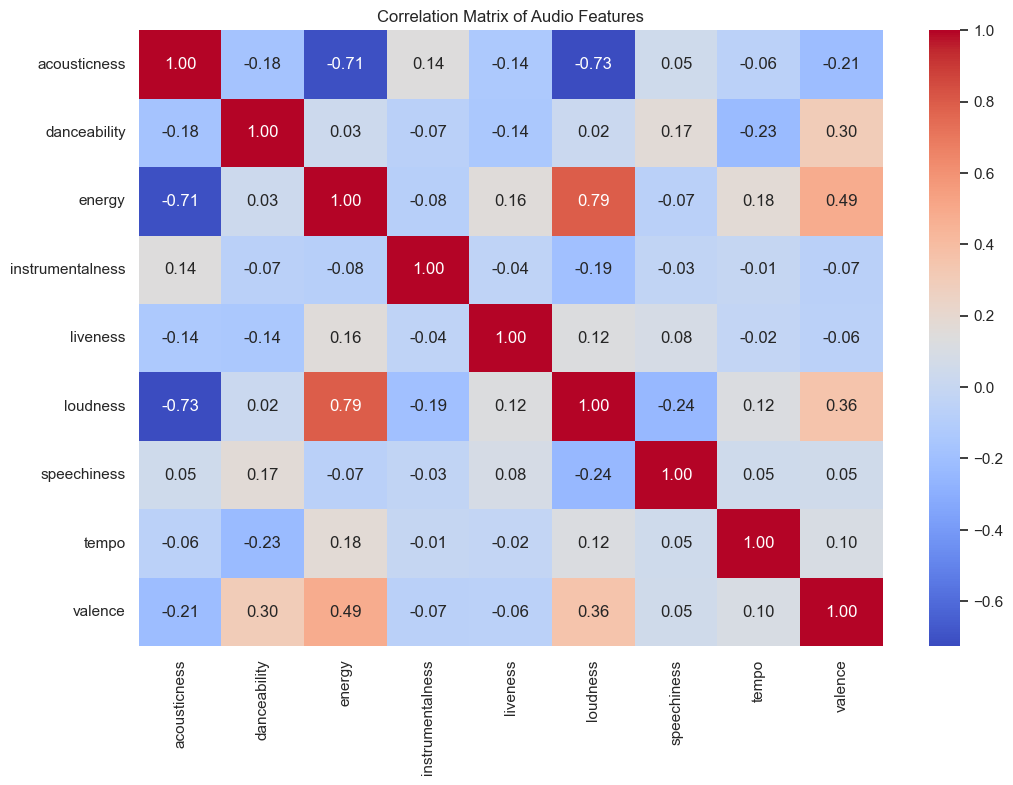

In [8]:
audio_features = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
audio_correlation = audio_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(audio_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features')
plt.show()

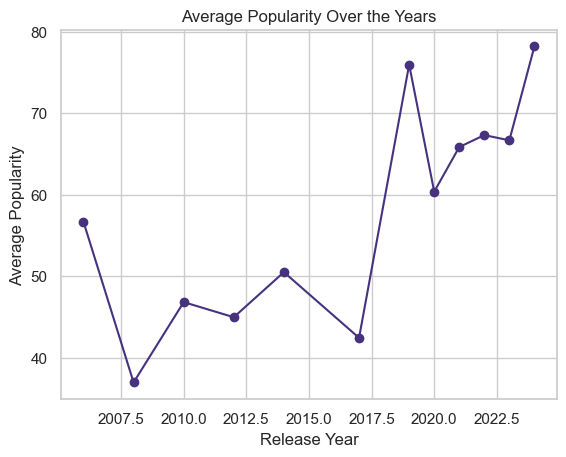

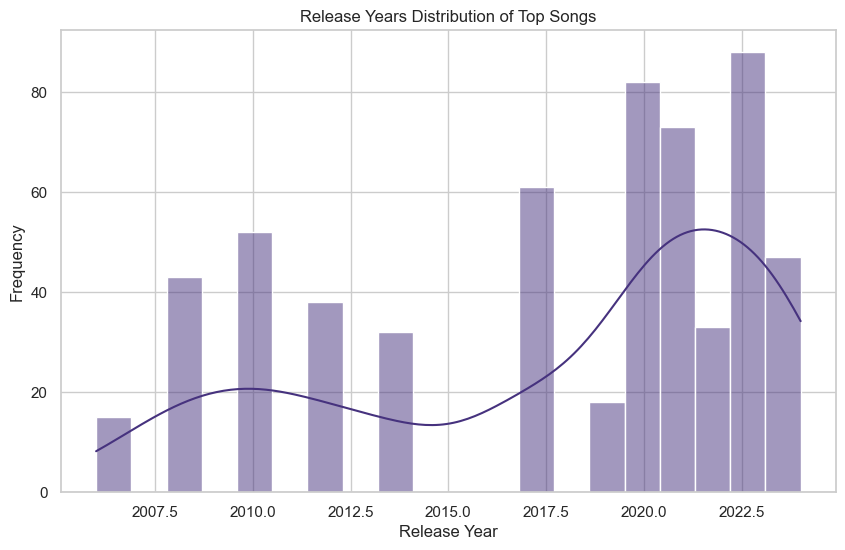

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
yearly_avg_popularity = df.groupby('release_year')['popularity'].mean()
yearly_avg_popularity.plot(marker='o')
plt.title('Average Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# Top Songs by Release Year Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title('Release Years Distribution of Top Songs')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

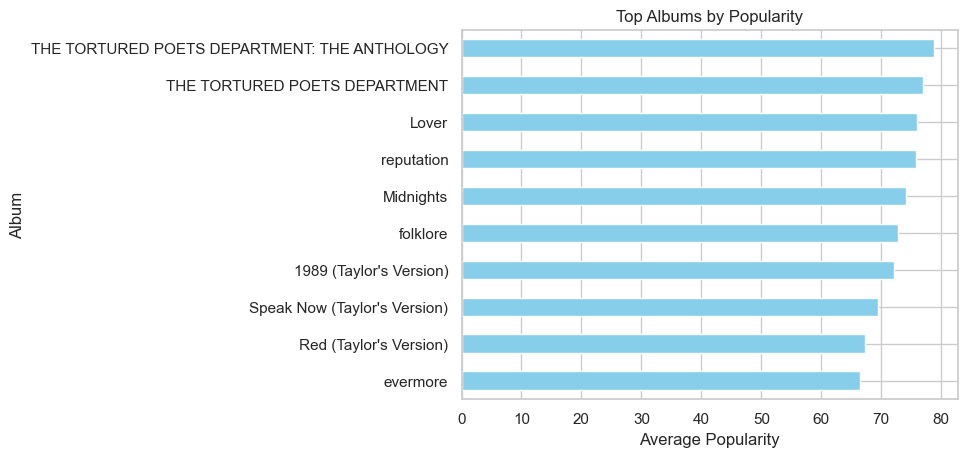

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_72569/2022282088.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=top_songs, palette='Blues_d')


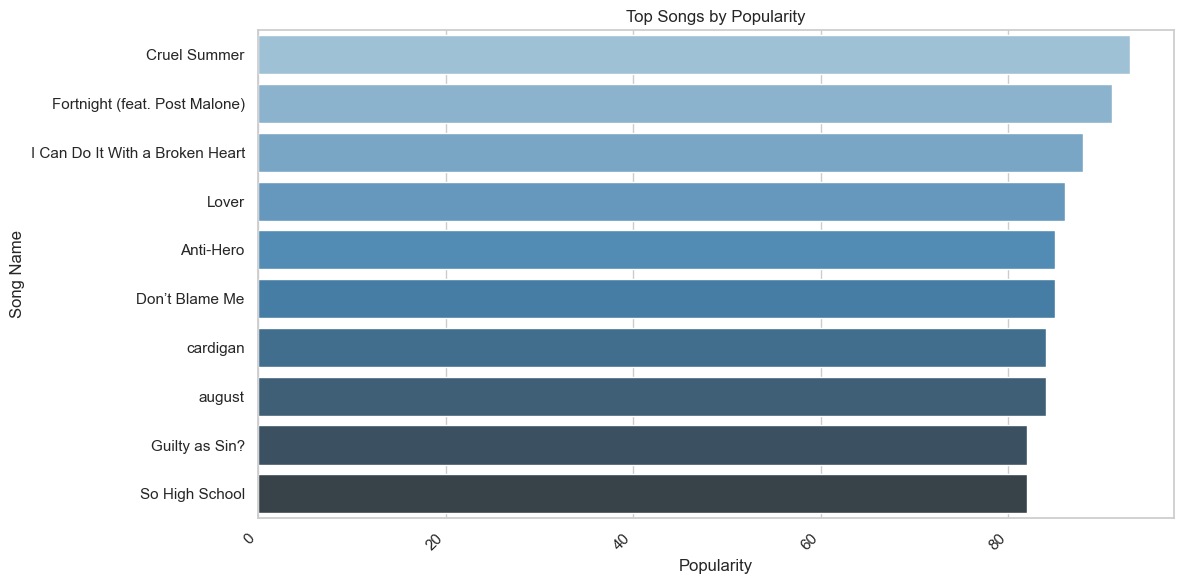

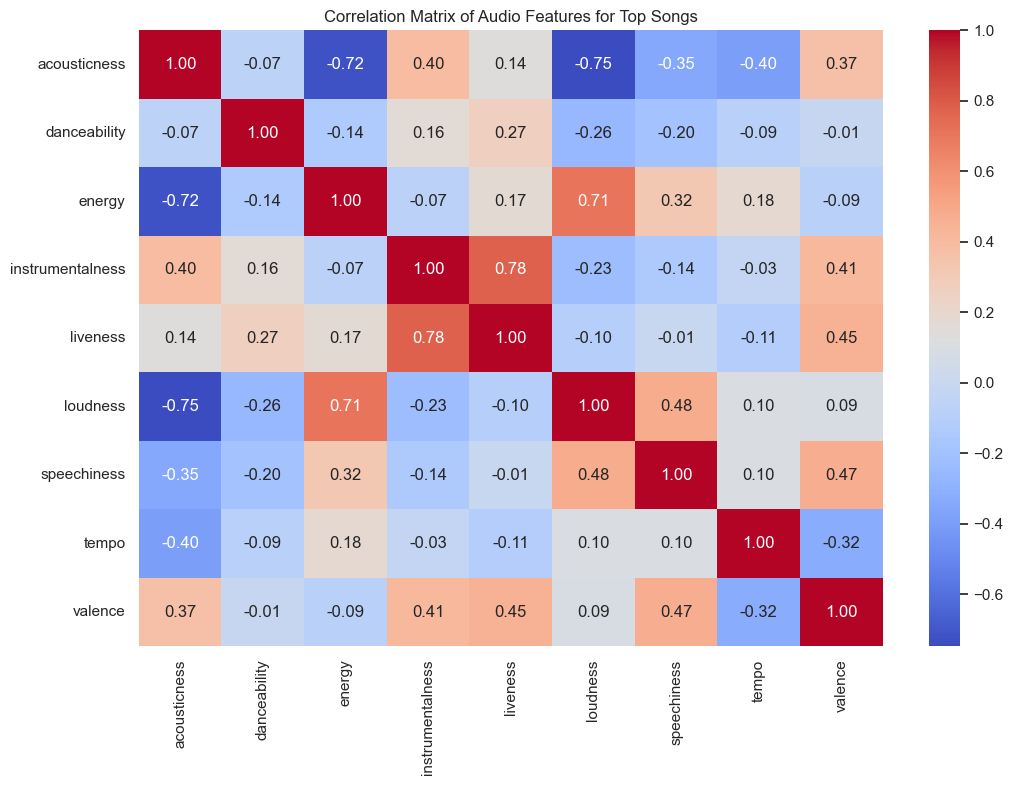

In [11]:
top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)

top_albums = top_albums[::-1]

top_albums.plot(kind='barh', color='skyblue') 
plt.title('Top Albums by Popularity')
plt.xlabel('Average Popularity')  
plt.ylabel('Album')  
plt.show()

top_songs = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='name', data=top_songs, palette='Blues_d')  
plt.title('Top Songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_songs_audio_features = top_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
top_songs_correlation = top_songs_audio_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(top_songs_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features for Top Songs')
plt.show()

The classifier is doing a decent job, but there's confusion between petal and sepal values — probably because the value ranges overlap (especially sepal length vs petal width).
Using just the scalar value as input limits the performance. You might improve accuracy by including feature type (e.g., length/width) or species as input features

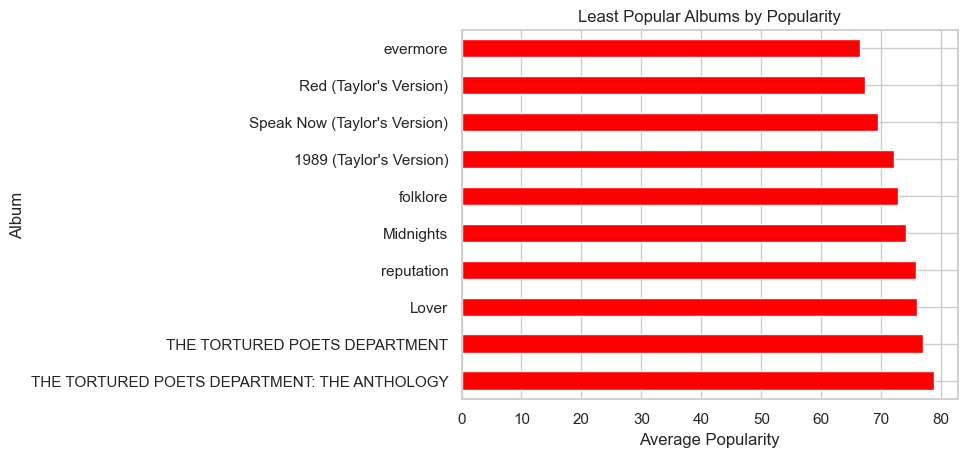

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_72569/2786120019.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=least_popular_songs, palette='viridis')


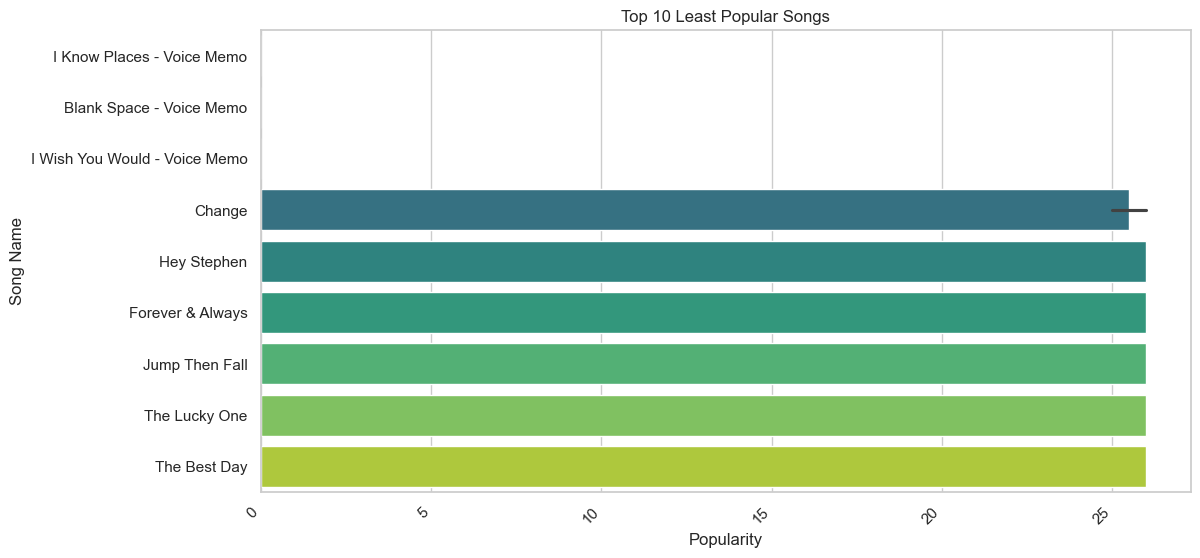

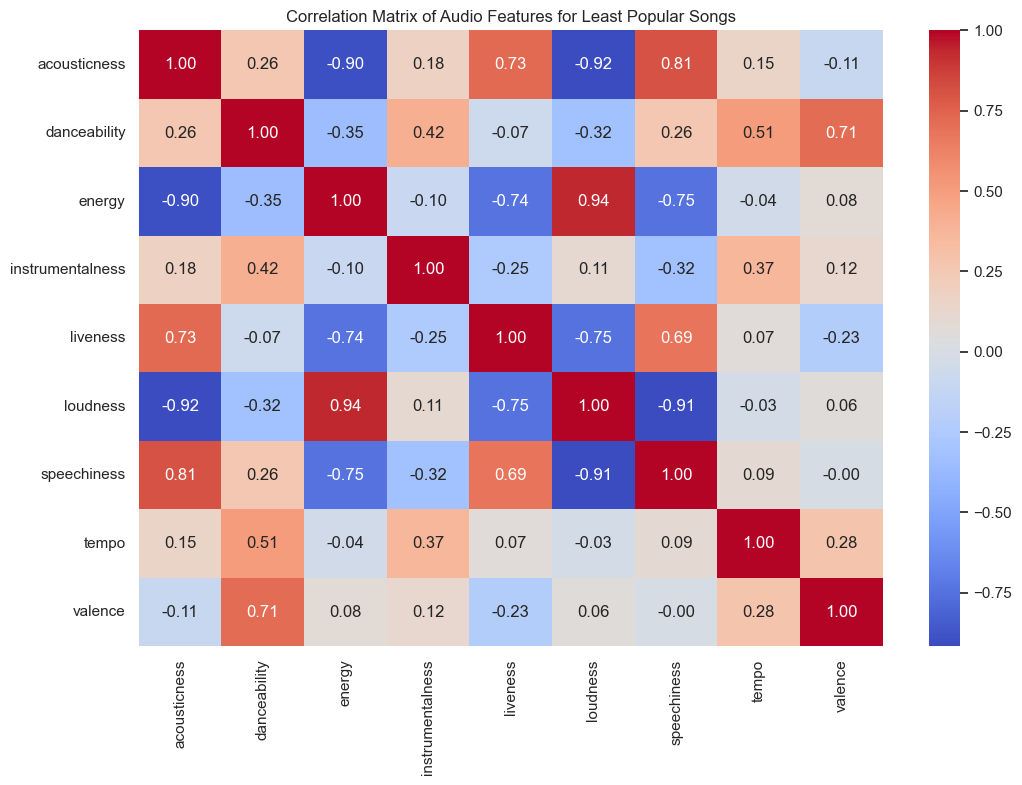

In [12]:
least_popular_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
least_popular_albums.plot(kind='barh', color='red') 
plt.title('Least Popular Albums by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()

# Identify the least popular songs
least_popular_songs = df.sort_values(by='popularity').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='name', data=least_popular_songs, palette='viridis') 
plt.title('Top 10 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Extract audio features for the least popular songs
least_popular_songs_audio_features = least_popular_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
least_popular_songs_correlation = least_popular_songs_audio_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(least_popular_songs_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features for Least Popular Songs')
plt.show()

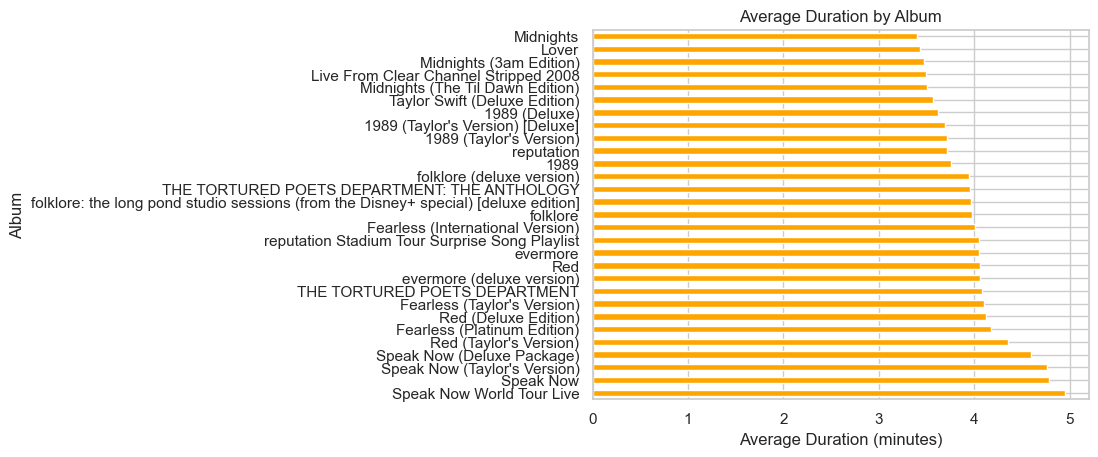

In [13]:
df['duration_min'] = df['duration_ms'] / (1000 * 60)

avg_duration_by_album = df.groupby('album')['duration_min'].mean().sort_values(ascending=False)
avg_duration_by_album.plot(kind='barh', color='orange')
plt.title('Average Duration by Album')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Album')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
file_path = 'taylor_swift_spotify.csv'
df = pd.read_csv(file_path)

features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']
# features = [
#     "danceability", "energy", "valence", "tempo", "acousticness",
#     "instrumentalness", "liveness", "speechiness", "loudness", "duration_ms"
# ]
df = df.dropna(subset=features + ['popularity'])

X = df[features]
y = (df['popularity'] >= 60).astype(int)  # 1 = popular, 0 = less popular

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [28]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.35      0.46        63
           1       0.64      0.87      0.73        83

    accuracy                           0.64       146
   macro avg       0.65      0.61      0.60       146
weighted avg       0.65      0.64      0.62       146



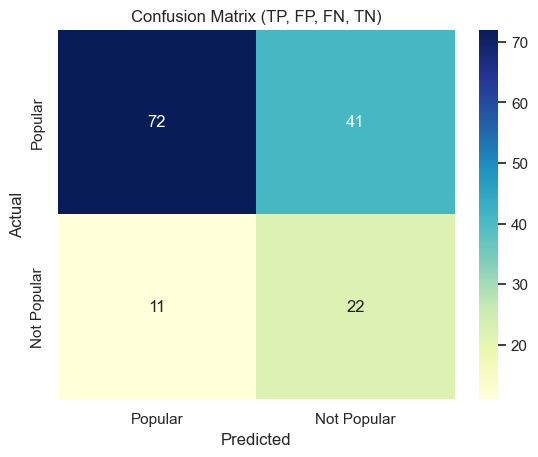

In [29]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
cm_custom = np.array([[tp, fp],
                      [fn, tn]])
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Popular", "Not Popular"],
            yticklabels=["Popular", "Not Popular"])
plt.title("Confusion Matrix (TP, FP, FN, TN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()